In [1]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_5FP_fold1_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.032708,-0.162020,0.021239,-0.024222,-0.157830,-0.088895,0.146881,-0.183734,-0.183197,-0.014329,...,-0.192884,-0.037607,-0.127582,-0.129562,0.002839,-0.104222,Abnormal,P52,FP-C,AB01
1,-0.140535,-0.162990,0.052336,0.012736,-0.082168,0.114513,0.191593,-0.193900,-0.171937,0.023992,...,-0.164951,0.247002,-0.183842,-0.091892,0.022716,-0.059844,Abnormal,P1,FP-A,AB02
2,-0.184467,-0.144017,0.260648,0.156909,-0.199261,0.050208,0.282702,-0.236025,-0.210922,0.068420,...,-0.216915,0.106598,-0.144483,-0.115475,0.002970,-0.113244,Abnormal,P2,FP-A,AB02
3,-0.167368,-0.151966,0.005027,0.045497,-0.220482,-0.001689,0.112344,-0.202976,-0.207957,0.016869,...,-0.207578,-0.005121,-0.162698,-0.137064,0.039624,-0.144896,Abnormal,P51,FP-C,AB02
4,-0.154830,-0.148515,0.022679,0.100662,-0.230392,0.074555,0.148815,-0.242381,-0.216518,0.074555,...,-0.227142,0.042526,-0.174041,-0.124634,0.041603,-0.141162,Abnormal,P42,FP-B,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,1.017405,0.894553,-0.191208,-0.190042,0.773660,-0.198802,-0.088365,0.243534,0.807968,-0.196573,...,0.803508,-0.180396,-0.204120,0.793742,-0.089568,0.634848,Normal,P32,FP-B,Normal
4597,1.174455,0.516220,-0.160872,-0.011638,0.566013,-0.176517,-0.090302,0.581597,0.464965,-0.150710,...,0.731399,-0.178792,-0.147156,0.209766,-0.075236,0.331292,Normal,P42,FP-B,Normal
4598,1.191545,0.877639,-0.197856,-0.108142,0.471384,-0.112280,-0.075920,0.518734,0.561777,-0.203415,...,0.285040,-0.189867,-0.109731,1.164817,0.012673,1.019294,Normal,P52,FP-C,Normal
4599,0.418652,0.753503,-0.194543,-0.152276,0.831251,-0.200320,-0.205435,0.559912,0.729486,-0.048663,...,0.437193,-0.172801,-0.135034,1.182482,-0.187244,0.945901,Normal,P61,FP-C,Normal


In [2]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(4601, 2048)
(4601,)


In [3]:
y[0]


'FP-C'

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [5]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [6]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.562933,0.045666,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.562063,0.042264,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.558585,0.042325,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.561628,0.043181,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.552931,0.038409,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.648359,0.054526,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.649663,0.054246,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.645098,0.055611,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.643358,0.050295,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.617272,0.045773,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [7]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.5629326605677638

 **print the array of mean scores only 

[0.56293266 0.56206262 0.55858483 0.56162784 0.55293125 0.64835943
 0.64966283 0.64509809 0.64335754 0.61727153 0.68291663 0.68313213
 0.67987079 0.68030322 0.63770207 0.68965481 0.68726257 0.68508677
 0.68182637 0.63683439 0.69204706 0.68704423 0.68421815 0.68312977
 0.63683439]

 **examine the best model 

0.6920470621522211
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, n_estimators=400, random_state=1)


In [8]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.6920470621522211


# setting parameters

In [9]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [10]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_5FP_fold1_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [11]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.153737,-0.138784,0.137943,-0.123214,-0.206309,-0.188063,0.100369,-0.049404,-0.180050,...,-0.137319,0.103782,-0.105585,-0.061467,-0.122208,-0.092524,Abnormal,P31,FP-B,AB01
1,1,-0.028438,-0.133757,0.282130,-0.108657,-0.210327,-0.043263,0.389655,-0.188884,-0.079164,...,-0.209019,0.005034,-0.102927,-0.063110,-0.078573,-0.088355,Abnormal,P1,FP-A,AB01
2,2,-0.107157,-0.130645,0.109546,0.023668,-0.181899,-0.125587,0.432066,-0.194315,-0.183115,...,-0.193133,-0.073300,-0.142099,-0.102524,-0.154614,-0.056559,Abnormal,P2,FP-A,AB01
3,3,-0.144092,-0.144814,0.306699,-0.005712,-0.203596,-0.051891,0.207564,-0.127166,-0.193819,...,-0.196189,0.186741,-0.079633,-0.127044,-0.037541,-0.149690,Abnormal,P42,FP-B,AB01
4,4,-0.054945,-0.051653,0.251870,-0.101658,-0.136217,-0.134739,0.257016,-0.099523,-0.084570,...,-0.050552,-0.089773,-0.091959,-0.064067,-0.109136,-0.148610,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,651,0.764140,1.423839,0.001750,-0.097308,0.627257,-0.137619,-0.155140,0.481085,0.984165,...,0.051397,-0.168722,-0.156749,1.168075,-0.161617,0.825065,Normal,P32,FP-B,Normal
652,652,0.389699,0.051683,-0.127803,-0.133451,0.046052,-0.111284,-0.052574,0.191022,0.024296,...,0.215155,-0.065612,-0.137907,0.110669,-0.137874,0.153426,Normal,P42,FP-B,Normal
653,653,1.287488,1.446855,-0.115007,-0.134472,0.624818,-0.159727,-0.063722,0.743706,0.442402,...,0.647148,-0.127578,-0.183933,0.964269,-0.098950,0.903015,Normal,P52,FP-C,Normal
654,654,1.066545,1.380697,-0.203800,-0.143413,0.569574,-0.069633,-0.091297,0.828280,1.114043,...,0.471728,-0.181323,-0.188003,1.453129,-0.180357,1.101810,Normal,P61,FP-C,Normal


In [12]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(656, 2048)
(656,)


In [13]:
y_test

0      FP-B
1      FP-A
2      FP-A
3      FP-B
4      FP-B
       ... 
651    FP-B
652    FP-B
653    FP-C
654    FP-C
655    FP-E
Name: Views, Length: 656, dtype: object

In [14]:
y_pred = modelOpt.predict(X_test)

In [15]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 61  47  23   3   3]
 [ 10 162  18   1   4]
 [  3  25 158   5   0]
 [  1   4  25  68   0]
 [  1   8   0   1  25]]
              precision    recall  f1-score   support

        FP-A       0.80      0.45      0.57       137
        FP-B       0.66      0.83      0.73       195
        FP-C       0.71      0.83      0.76       191
        FP-D       0.87      0.69      0.77        98
        FP-E       0.78      0.71      0.75        35

    accuracy                           0.72       656
   macro avg       0.76      0.70      0.72       656
weighted avg       0.74      0.72      0.71       656



Text(0.5, 21.5, 'Predicted label')

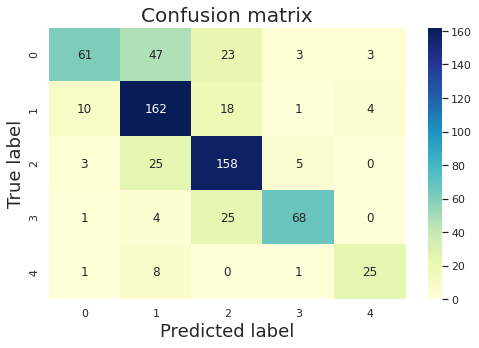

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [17]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_AN_5FP_fold1_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)